In [11]:
import numpy as np
import matplotlib.pyplot as plt

COLORMAP = {
    "red" : "#E06C75",
    "green" : "#98C379",
    "yellow" : "#E5C07B",
    "blue" : "#61AFEF",
    "purple" : "#C678DD",
    "mint" : "#56B6C2",
    "grey" : "#ABB2BF"
}

# Free Energy

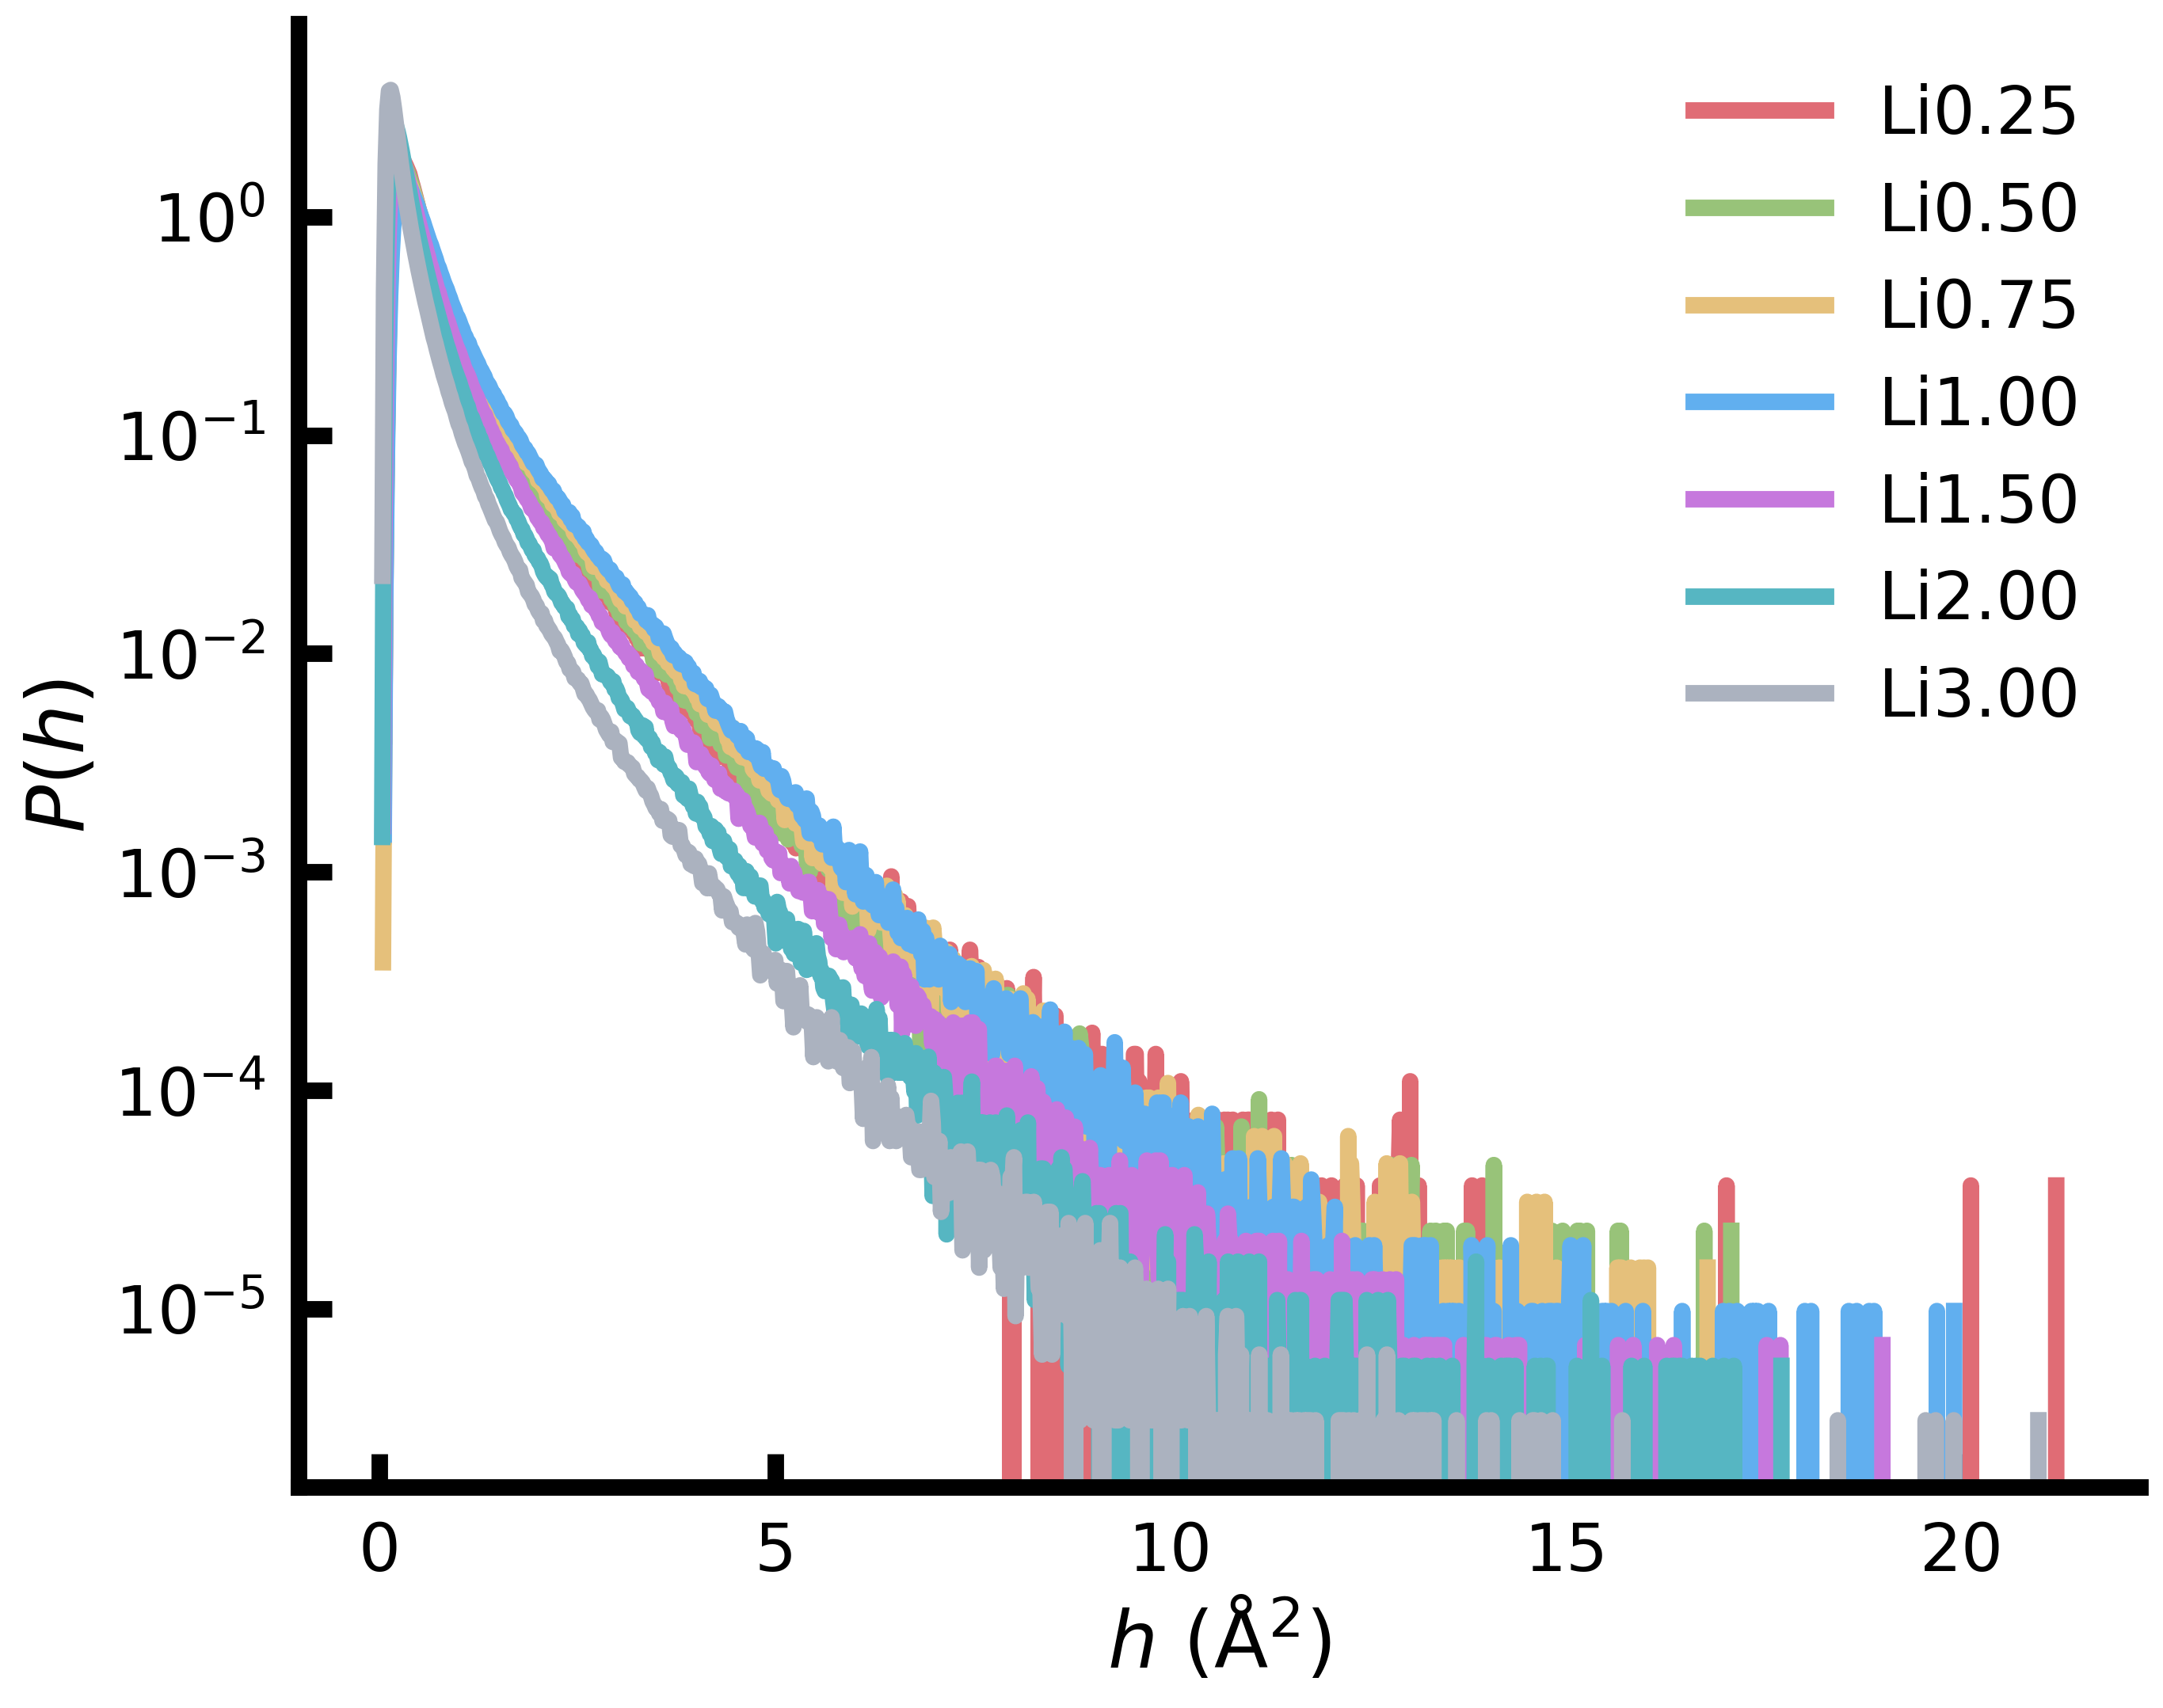

In [12]:
params = {
    "linewidth" : 5,
    "axeswidth" : 5,
    "tick_labelsize" : 20,
    "axes_labelsize" : 24,
    "tick_padding" : 10,
}

fig, ax = plt.subplots(1, 1, figsize = (10, 8), dpi = 300)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(params['axeswidth'])
ax.spines['bottom'].set_linewidth(params['axeswidth'])
ax.tick_params(labelsize = params['tick_labelsize'], pad = params['tick_padding'], length = params['axeswidth'] * 2, width = params['axeswidth'], direction = 'in')

ax.set_xlabel("$h$ (Å$^2$)", fontsize = params['axes_labelsize'])
ax.set_ylabel(r"$P(h)$", fontsize = params['axes_labelsize'])

ROOT = "/mnt/CALC_SSD/bgkang/hopping_analysis/trajectories/"
for idx, t in enumerate(["Li0.25", "Li0.50", "Li0.75", "Li1.00", "Li1.50", "Li2.00", "Li3.00"]):
    data = []
    for e in "00", "01", "02", "03":
        data.append(np.genfromtxt(f"{ROOT}/composition/{t}/ensemble{e}/hop.out")[:,1:])
    data = np.stack(data).flatten()

    hist, bins = np.histogram(data, bins = 1000, density = True)

    ax.plot(bins[1:], hist, linewidth = params['linewidth'], color = COLORMAP[list(COLORMAP.keys())[idx]], label = t)

ax.set_yscale('log')

ax.legend(fontsize = params['tick_labelsize'], frameon = False)

plt.savefig("hop_hist.png", dpi = 300, bbox_inches = 'tight')
plt.show()

# N-th shell

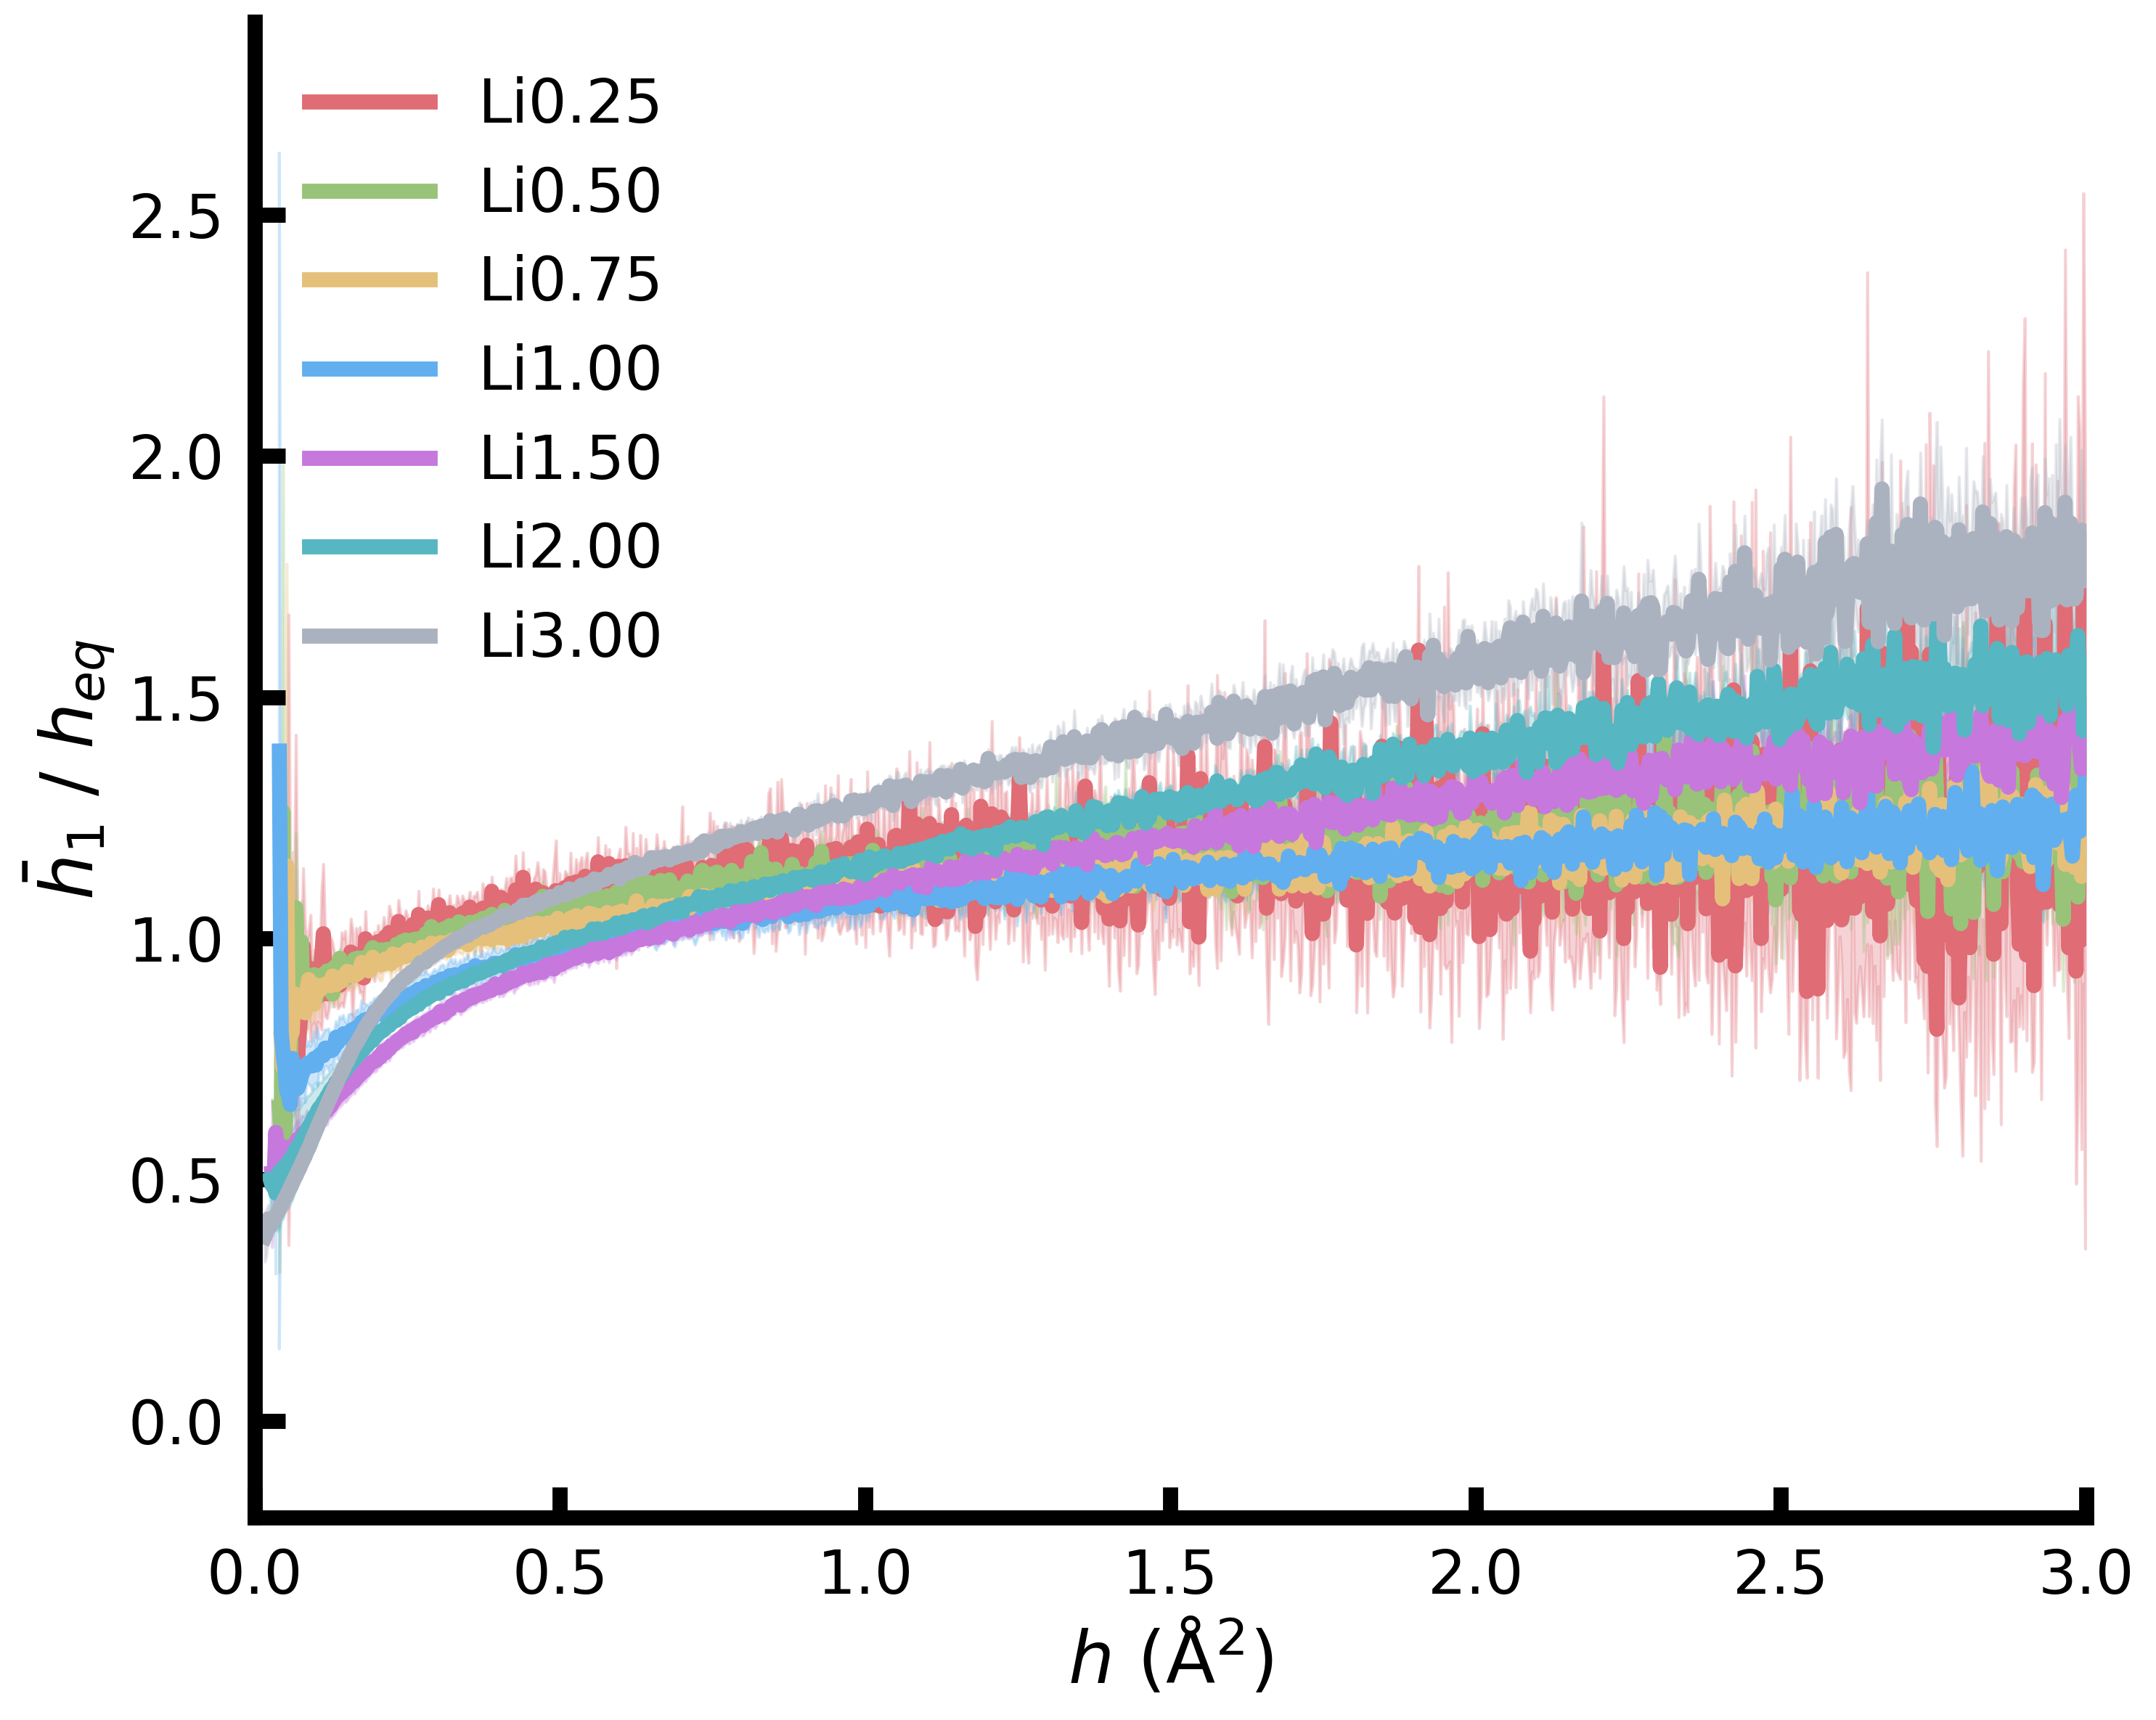

In [13]:
params = {
    "linewidth" : 5,
    "axeswidth" : 5,
    "tick_labelsize" : 20,
    "axes_labelsize" : 24,
    "tick_padding" : 10,
    "markersize" : 5,
}

fig, ax = plt.subplots(1, 1, figsize = (10, 8), dpi = 300)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(params['axeswidth'])
ax.spines['bottom'].set_linewidth(params['axeswidth'])
ax.tick_params(labelsize = params['tick_labelsize'], pad = params['tick_padding'], length = params['axeswidth'] * 2, width = params['axeswidth'], direction = 'in')

ax.set_xlabel("$h$ (Å$^2$)", fontsize = params['axes_labelsize'])
ax.set_ylabel(r"$\bar{h}_{1}$ / $h_{eq}$", fontsize = params['axes_labelsize'])

ROOT = "/mnt/CALC_SSD/bgkang/hopping_analysis/trajectories/"
for idx, t in enumerate(["Li0.25", "Li0.50", "Li0.75", "Li1.00", "Li1.50", "Li2.00", "Li3.00"]):
    data = []
    h = []
    for e in "00", "01", "02", "03":
        temp = np.genfromtxt(f"{ROOT}/composition/{t}/ensemble{e}/shell.out")
        data.append(temp)
        h.append(np.genfromtxt(f"{ROOT}/composition/{t}/ensemble{e}/hop.out")[:,1:].mean())
    avg = np.stack(data).mean(axis = 0)
    std = np.stack(data).std(axis = 0)
    heq = np.stack(h).mean()

    ax.plot(avg[:,0], avg[:,2] / heq, linewidth = params['linewidth'], color = COLORMAP[list(COLORMAP.keys())[idx]], label = t)
    ax.fill_between(avg[:,0], (avg[:,2] + std[:,2]) / heq, (avg[:,2] - std[:,2]) / heq, color = COLORMAP[list(COLORMAP.keys())[idx]], alpha = 0.3)

ax.set_xlim(0, 3)
ax.set_ylim(-0.2, 2.9)

legend = ax.legend(fontsize = params['tick_labelsize'], frameon = False)
legend.get_title().set_fontsize(params['axes_labelsize'])

plt.tight_layout()
plt.savefig("shell_hop_n1.png", dpi = 300, bbox_inches = 'tight')
plt.show()

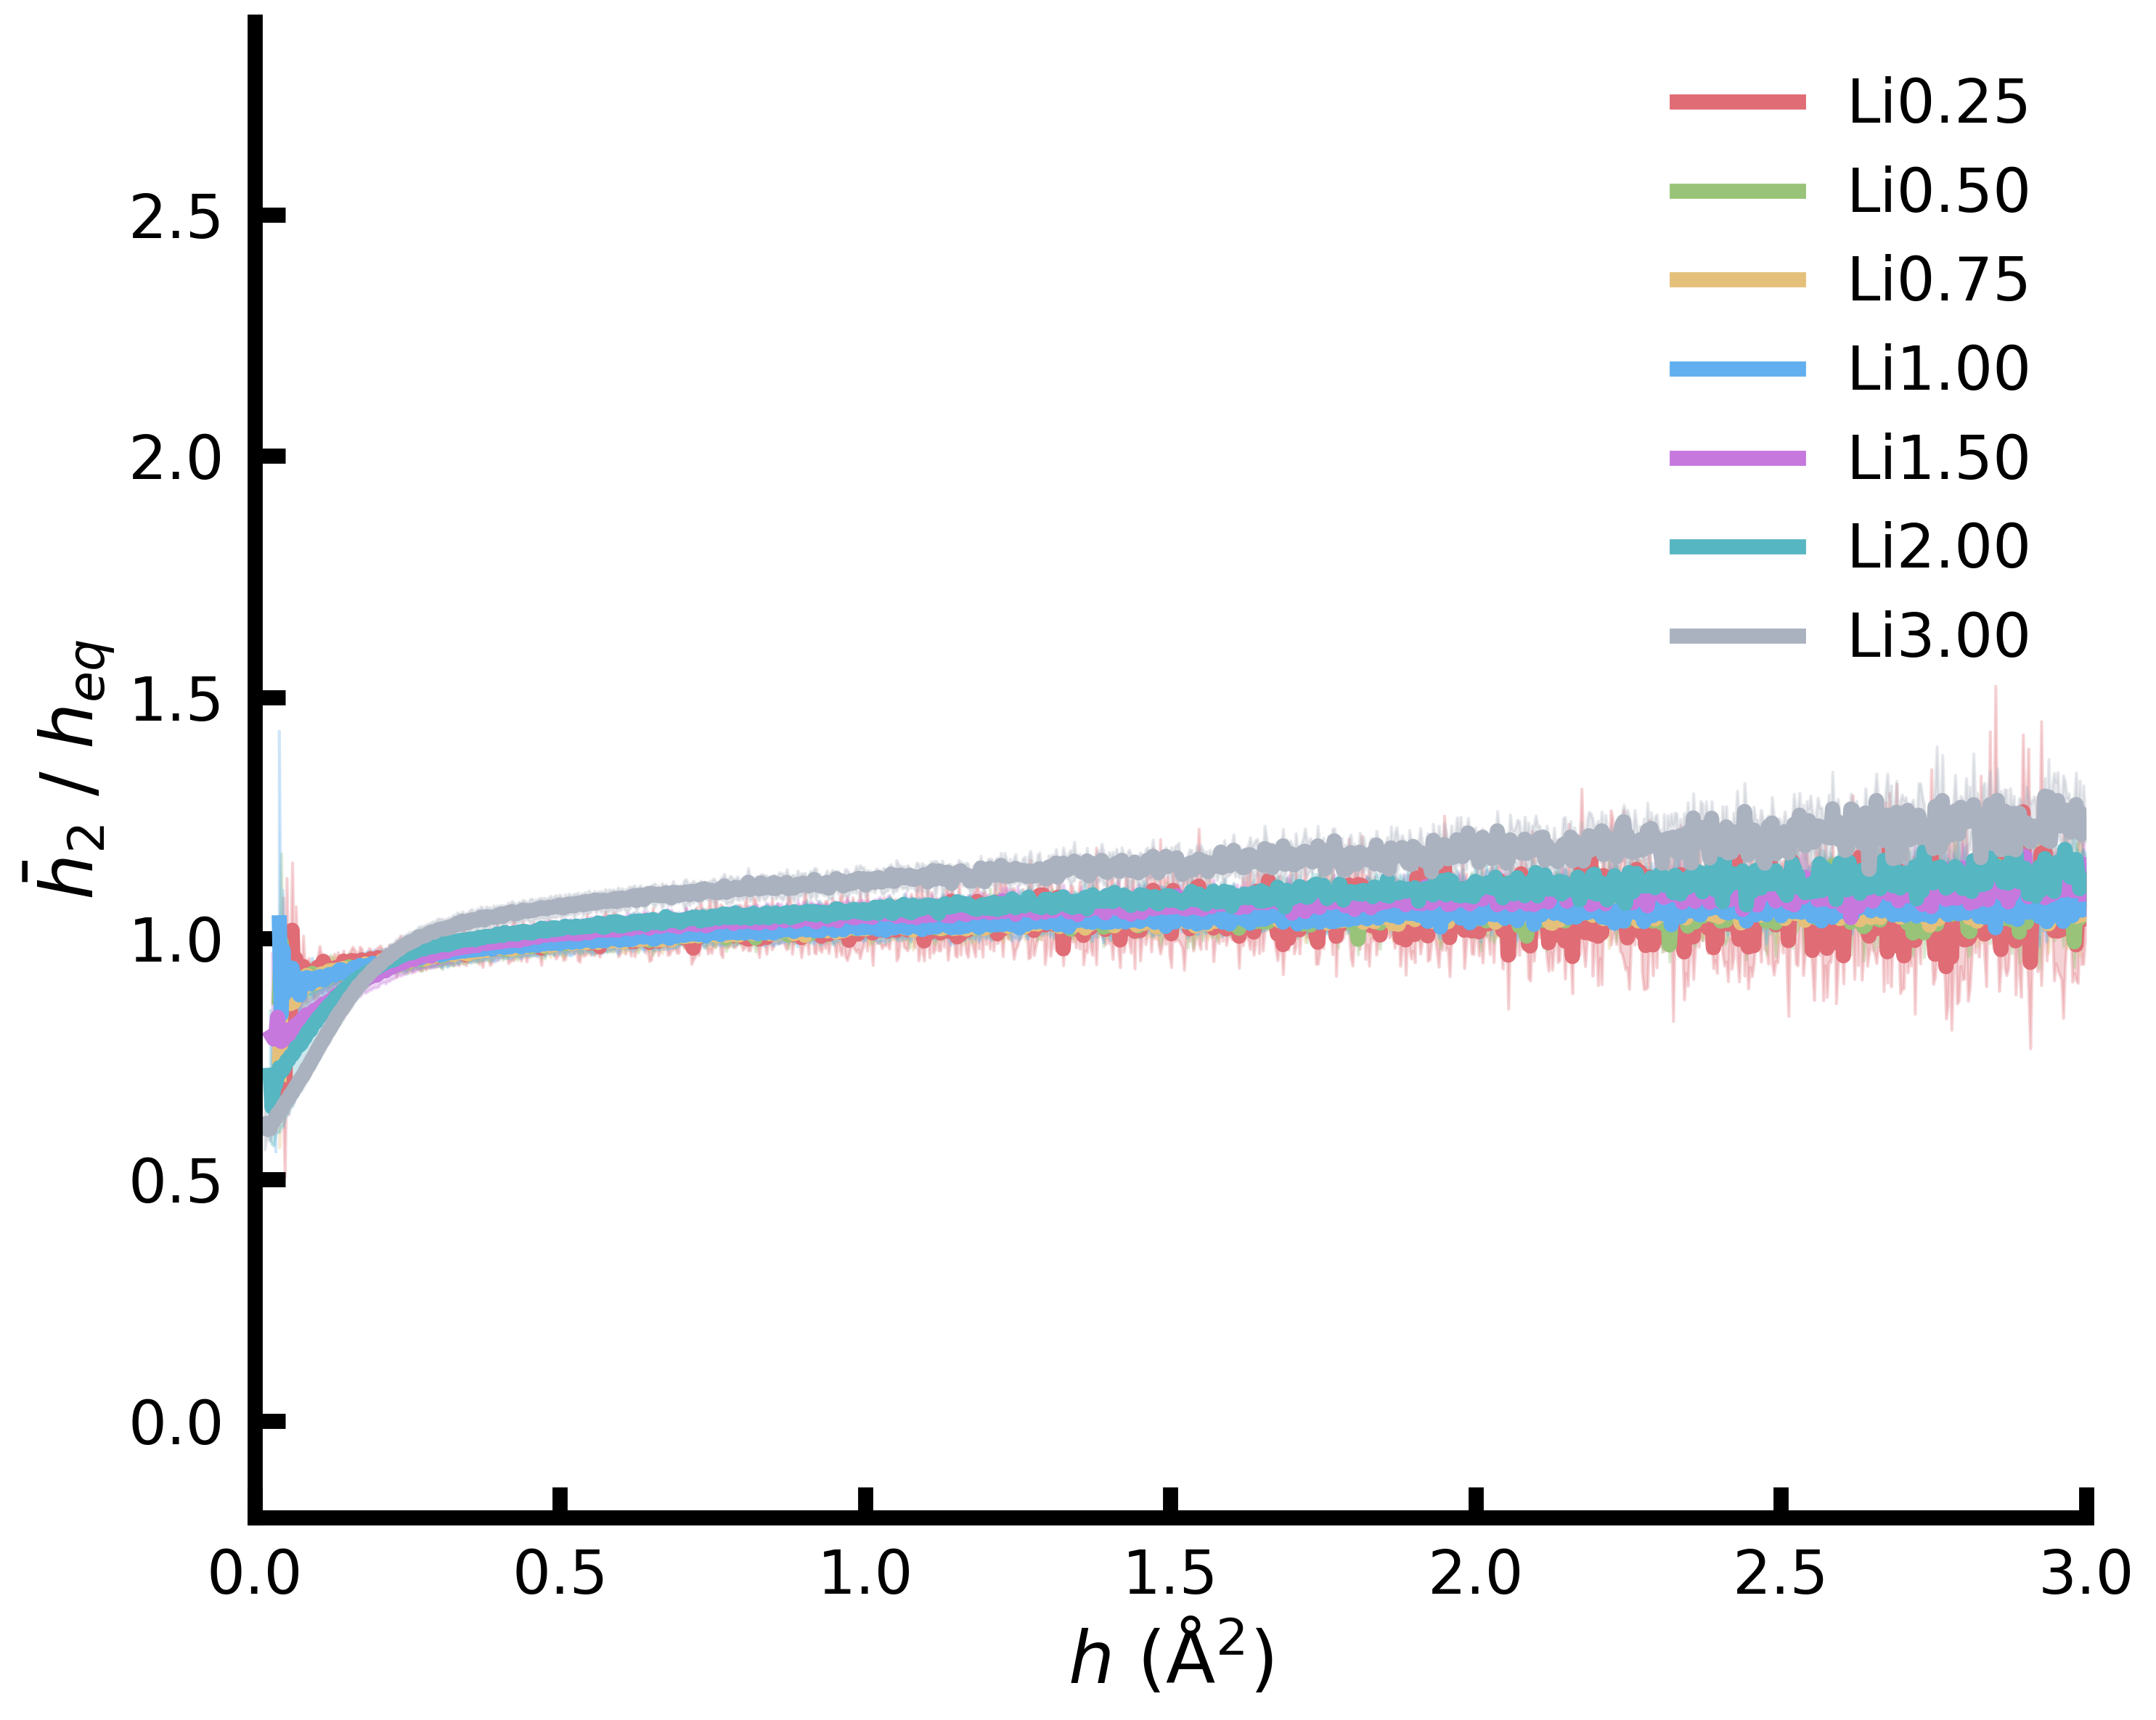

In [14]:
params = {
    "linewidth" : 5,
    "axeswidth" : 5,
    "tick_labelsize" : 20,
    "axes_labelsize" : 24,
    "tick_padding" : 10,
    "markersize" : 5,
}

fig, ax = plt.subplots(1, 1, figsize = (10, 8), dpi = 300)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(params['axeswidth'])
ax.spines['bottom'].set_linewidth(params['axeswidth'])
ax.tick_params(labelsize = params['tick_labelsize'], pad = params['tick_padding'], length = params['axeswidth'] * 2, width = params['axeswidth'], direction = 'in')

ax.set_xlabel("$h$ (Å$^2$)", fontsize = params['axes_labelsize'])
ax.set_ylabel(r"$\bar{h}_{2}$ / $h_{eq}$", fontsize = params['axes_labelsize'])

ROOT = "/mnt/CALC_SSD/bgkang/hopping_analysis/trajectories/"
for idx, t in enumerate(["Li0.25", "Li0.50", "Li0.75", "Li1.00", "Li1.50", "Li2.00", "Li3.00"]):
    data = []
    h = []
    for e in "00", "01", "02", "03":
        temp = np.genfromtxt(f"{ROOT}/composition/{t}/ensemble{e}/shell.out")
        data.append(temp)
        h.append(np.genfromtxt(f"{ROOT}/composition/{t}/ensemble{e}/hop.out")[:,1:].mean())
    avg = np.stack(data).mean(axis = 0)
    std = np.stack(data).std(axis = 0)
    heq = np.stack(h).mean()

    ax.plot(avg[:,0], avg[:,3] / heq, linewidth = params['linewidth'], color = COLORMAP[list(COLORMAP.keys())[idx]], label = t)
    ax.fill_between(avg[:,0], (avg[:,3] + std[:,3]) / heq, (avg[:,3] - std[:,3]) / heq, color = COLORMAP[list(COLORMAP.keys())[idx]], alpha = 0.3)

ax.set_xlim(0, 3)
ax.set_ylim(-0.2, 2.9)

legend = ax.legend(fontsize = params['tick_labelsize'], frameon = False)
legend.get_title().set_fontsize(params['axes_labelsize'])

plt.tight_layout()
plt.savefig("shell_hop_n2.png", dpi = 300, bbox_inches = 'tight')
plt.show()

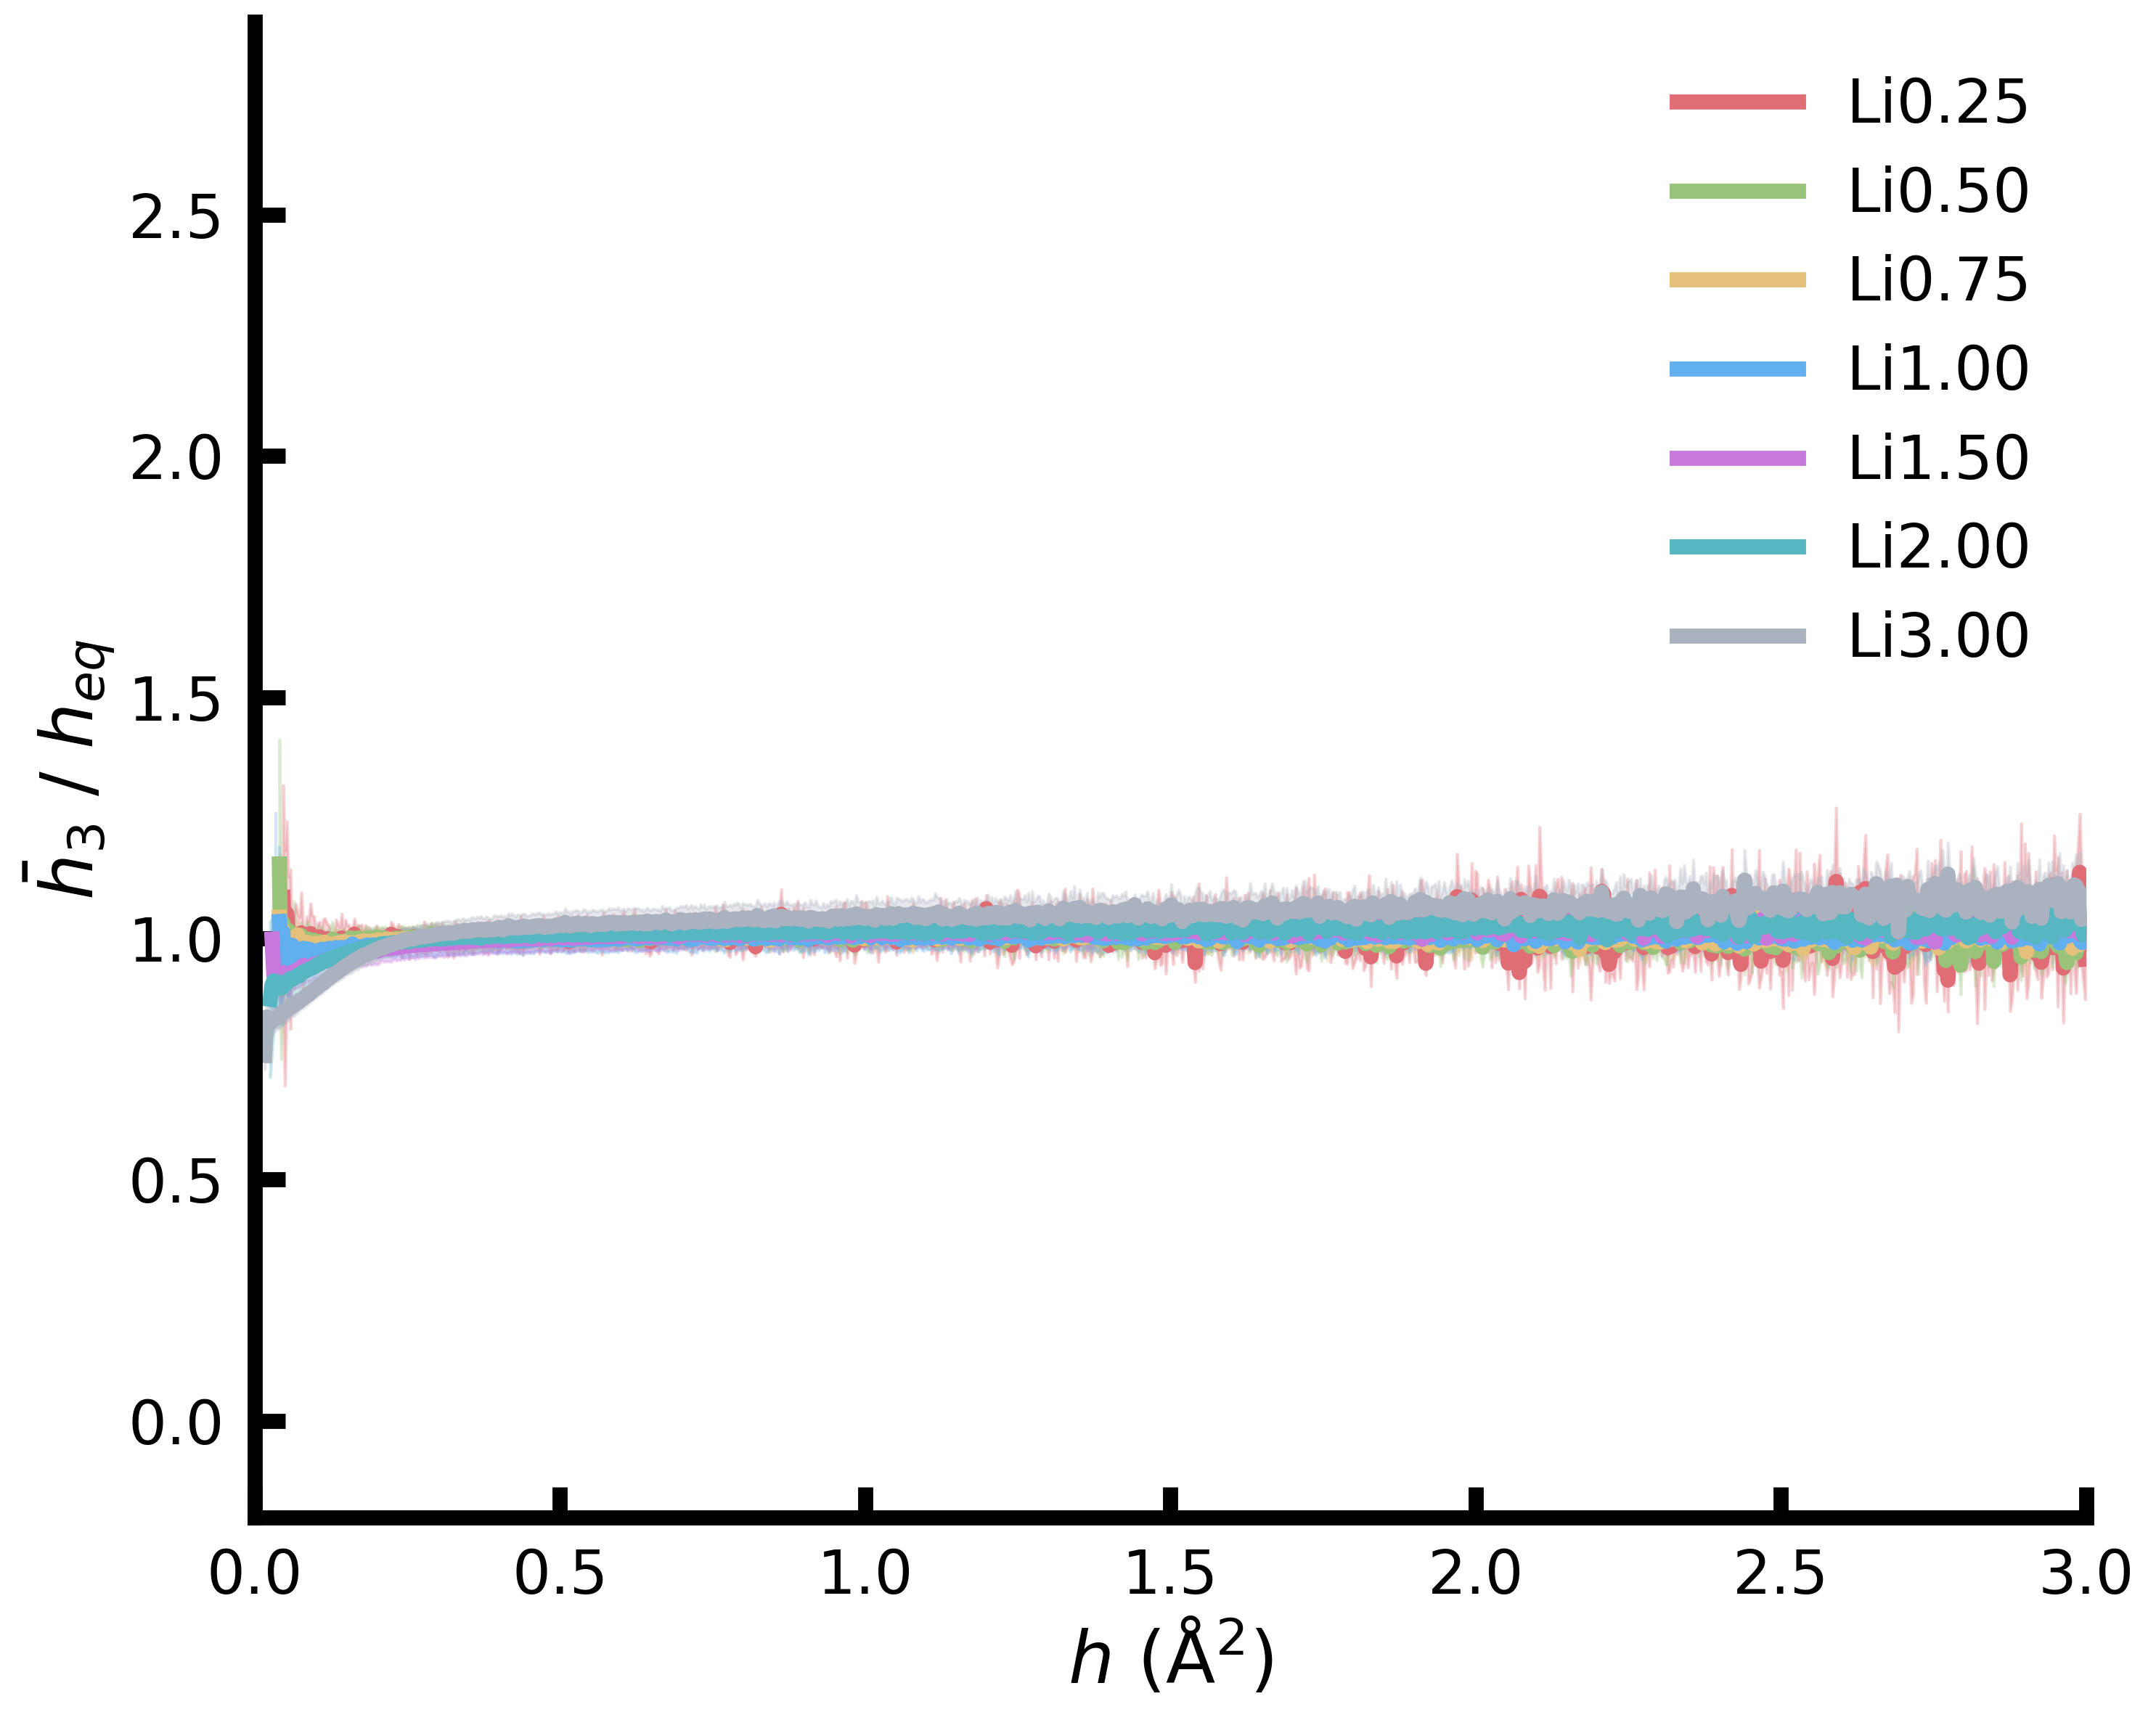

In [15]:
params = {
    "linewidth" : 5,
    "axeswidth" : 5,
    "tick_labelsize" : 20,
    "axes_labelsize" : 24,
    "tick_padding" : 10,
    "markersize" : 5,
}

fig, ax = plt.subplots(1, 1, figsize = (10, 8), dpi = 300)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(params['axeswidth'])
ax.spines['bottom'].set_linewidth(params['axeswidth'])
ax.tick_params(labelsize = params['tick_labelsize'], pad = params['tick_padding'], length = params['axeswidth'] * 2, width = params['axeswidth'], direction = 'in')

ax.set_xlabel("$h$ (Å$^2$)", fontsize = params['axes_labelsize'])
ax.set_ylabel(r"$\bar{h}_{3}$ / $h_{eq}$", fontsize = params['axes_labelsize'])

ROOT = "/mnt/CALC_SSD/bgkang/hopping_analysis/trajectories/"
for idx, t in enumerate(["Li0.25", "Li0.50", "Li0.75", "Li1.00", "Li1.50", "Li2.00", "Li3.00"]):
    data = []
    h = []
    for e in "00", "01", "02", "03":
        temp = np.genfromtxt(f"{ROOT}/composition/{t}/ensemble{e}/shell.out")
        data.append(temp)
        h.append(np.genfromtxt(f"{ROOT}/composition/{t}/ensemble{e}/hop.out")[:,1:].mean())
    avg = np.stack(data).mean(axis = 0)
    std = np.stack(data).std(axis = 0)
    heq = np.stack(h).mean()

    ax.plot(avg[:,0], avg[:,4] / heq, linewidth = params['linewidth'], color = COLORMAP[list(COLORMAP.keys())[idx]], label = t)
    ax.fill_between(avg[:,0], (avg[:,4] + std[:,4]) / heq, (avg[:,4] - std[:,4]) / heq, color = COLORMAP[list(COLORMAP.keys())[idx]], alpha = 0.3)

ax.set_xlim(0, 3)
ax.set_ylim(-0.2, 2.9)

legend = ax.legend(fontsize = params['tick_labelsize'], frameon = False)
legend.get_title().set_fontsize(params['axes_labelsize'])

plt.tight_layout()
plt.savefig("shell_hop_n3.png", dpi = 300, bbox_inches = 'tight')
plt.show()

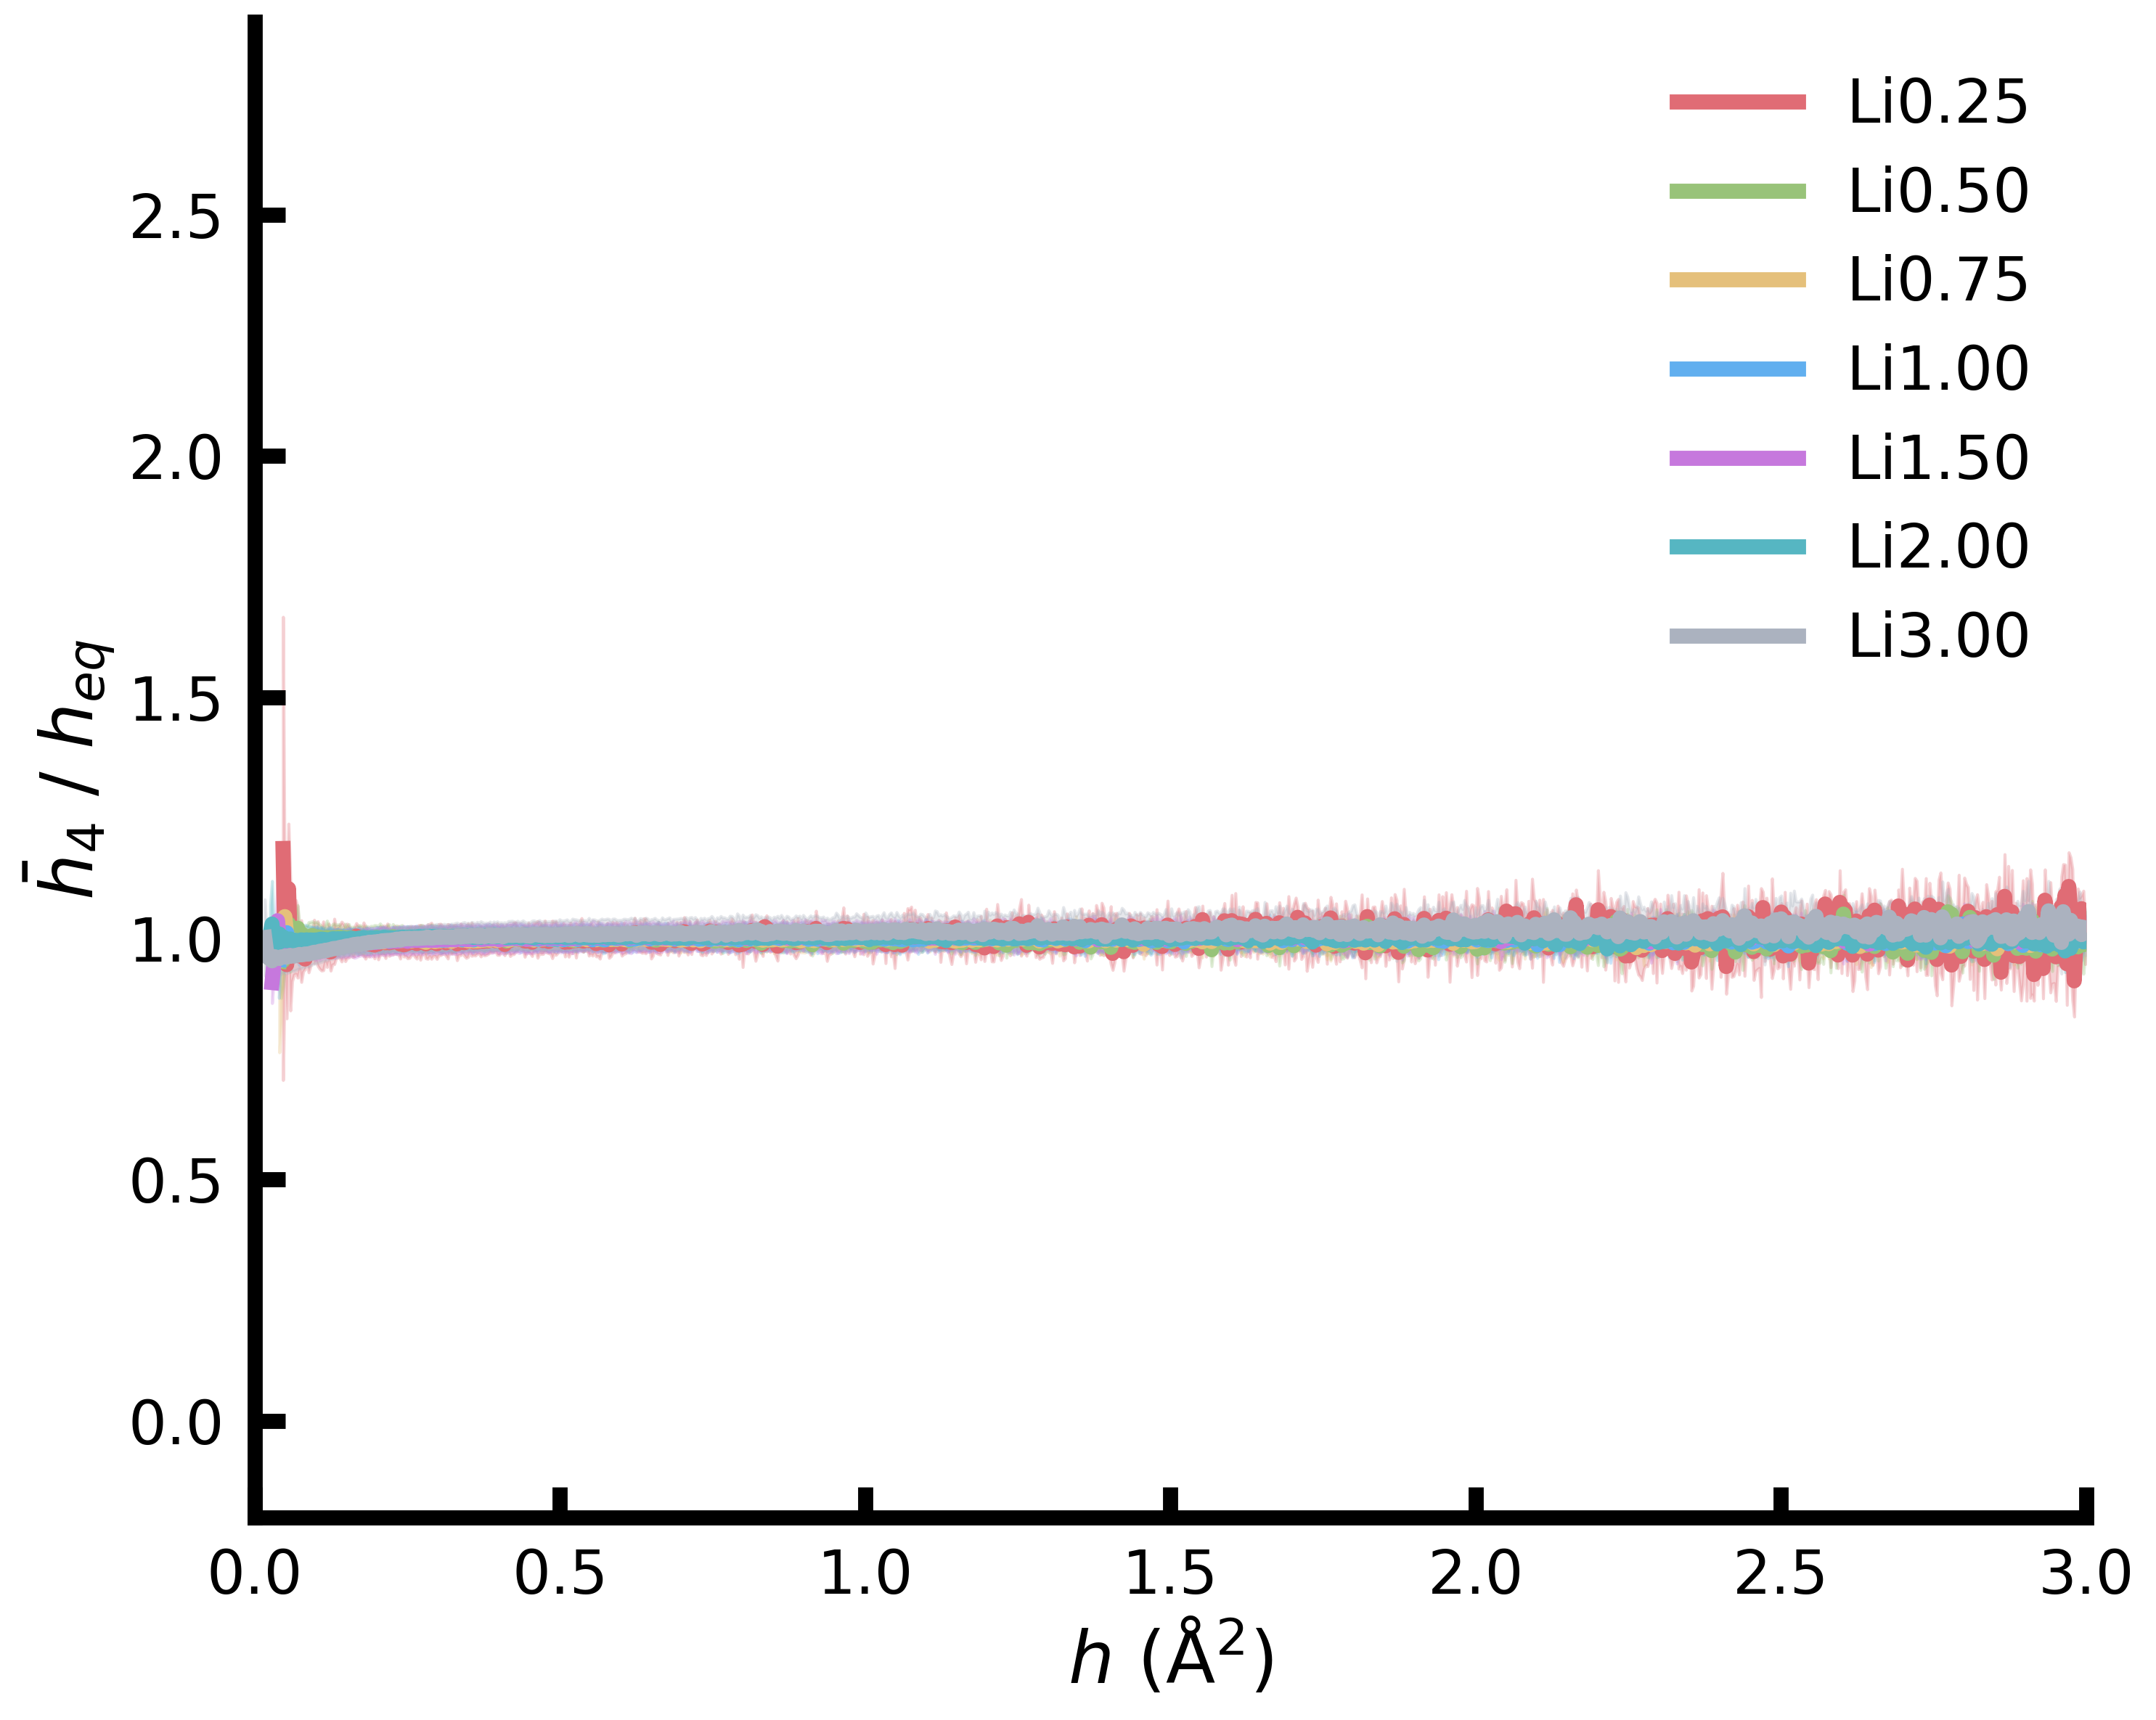

In [16]:
params = {
    "linewidth" : 5,
    "axeswidth" : 5,
    "tick_labelsize" : 20,
    "axes_labelsize" : 24,
    "tick_padding" : 10,
    "markersize" : 5,
}

fig, ax = plt.subplots(1, 1, figsize = (10, 8), dpi = 300)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(params['axeswidth'])
ax.spines['bottom'].set_linewidth(params['axeswidth'])
ax.tick_params(labelsize = params['tick_labelsize'], pad = params['tick_padding'], length = params['axeswidth'] * 2, width = params['axeswidth'], direction = 'in')

ax.set_xlabel("$h$ (Å$^2$)", fontsize = params['axes_labelsize'])
ax.set_ylabel(r"$\bar{h}_{4}$ / $h_{eq}$", fontsize = params['axes_labelsize'])

ROOT = "/mnt/CALC_SSD/bgkang/hopping_analysis/trajectories/"
for idx, t in enumerate(["Li0.25", "Li0.50", "Li0.75", "Li1.00", "Li1.50", "Li2.00", "Li3.00"]):
    data = []
    h = []
    for e in "00", "01", "02", "03":
        temp = np.genfromtxt(f"{ROOT}/composition/{t}/ensemble{e}/shell.out")
        data.append(temp)
        h.append(np.genfromtxt(f"{ROOT}/composition/{t}/ensemble{e}/hop.out")[:,1:].mean())
    avg = np.stack(data).mean(axis = 0)
    std = np.stack(data).std(axis = 0)
    heq = np.stack(h).mean()

    ax.plot(avg[:,0], avg[:,5] / heq, linewidth = params['linewidth'], color = COLORMAP[list(COLORMAP.keys())[idx]], label = t)
    ax.fill_between(avg[:,0], (avg[:,5] + std[:,5]) / heq, (avg[:,5] - std[:,5]) / heq, color = COLORMAP[list(COLORMAP.keys())[idx]], alpha = 0.3)

ax.set_xlim(0, 3)
ax.set_ylim(-0.2, 2.9)

legend = ax.legend(fontsize = params['tick_labelsize'], frameon = False)
legend.get_title().set_fontsize(params['axes_labelsize'])

plt.tight_layout()
plt.savefig("shell_hop_n4.png", dpi = 300, bbox_inches = 'tight')
plt.show()

# Survival Probability

/tmp/ipykernel_891301/3938173694.py:13: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c * np.exp(-d * x)


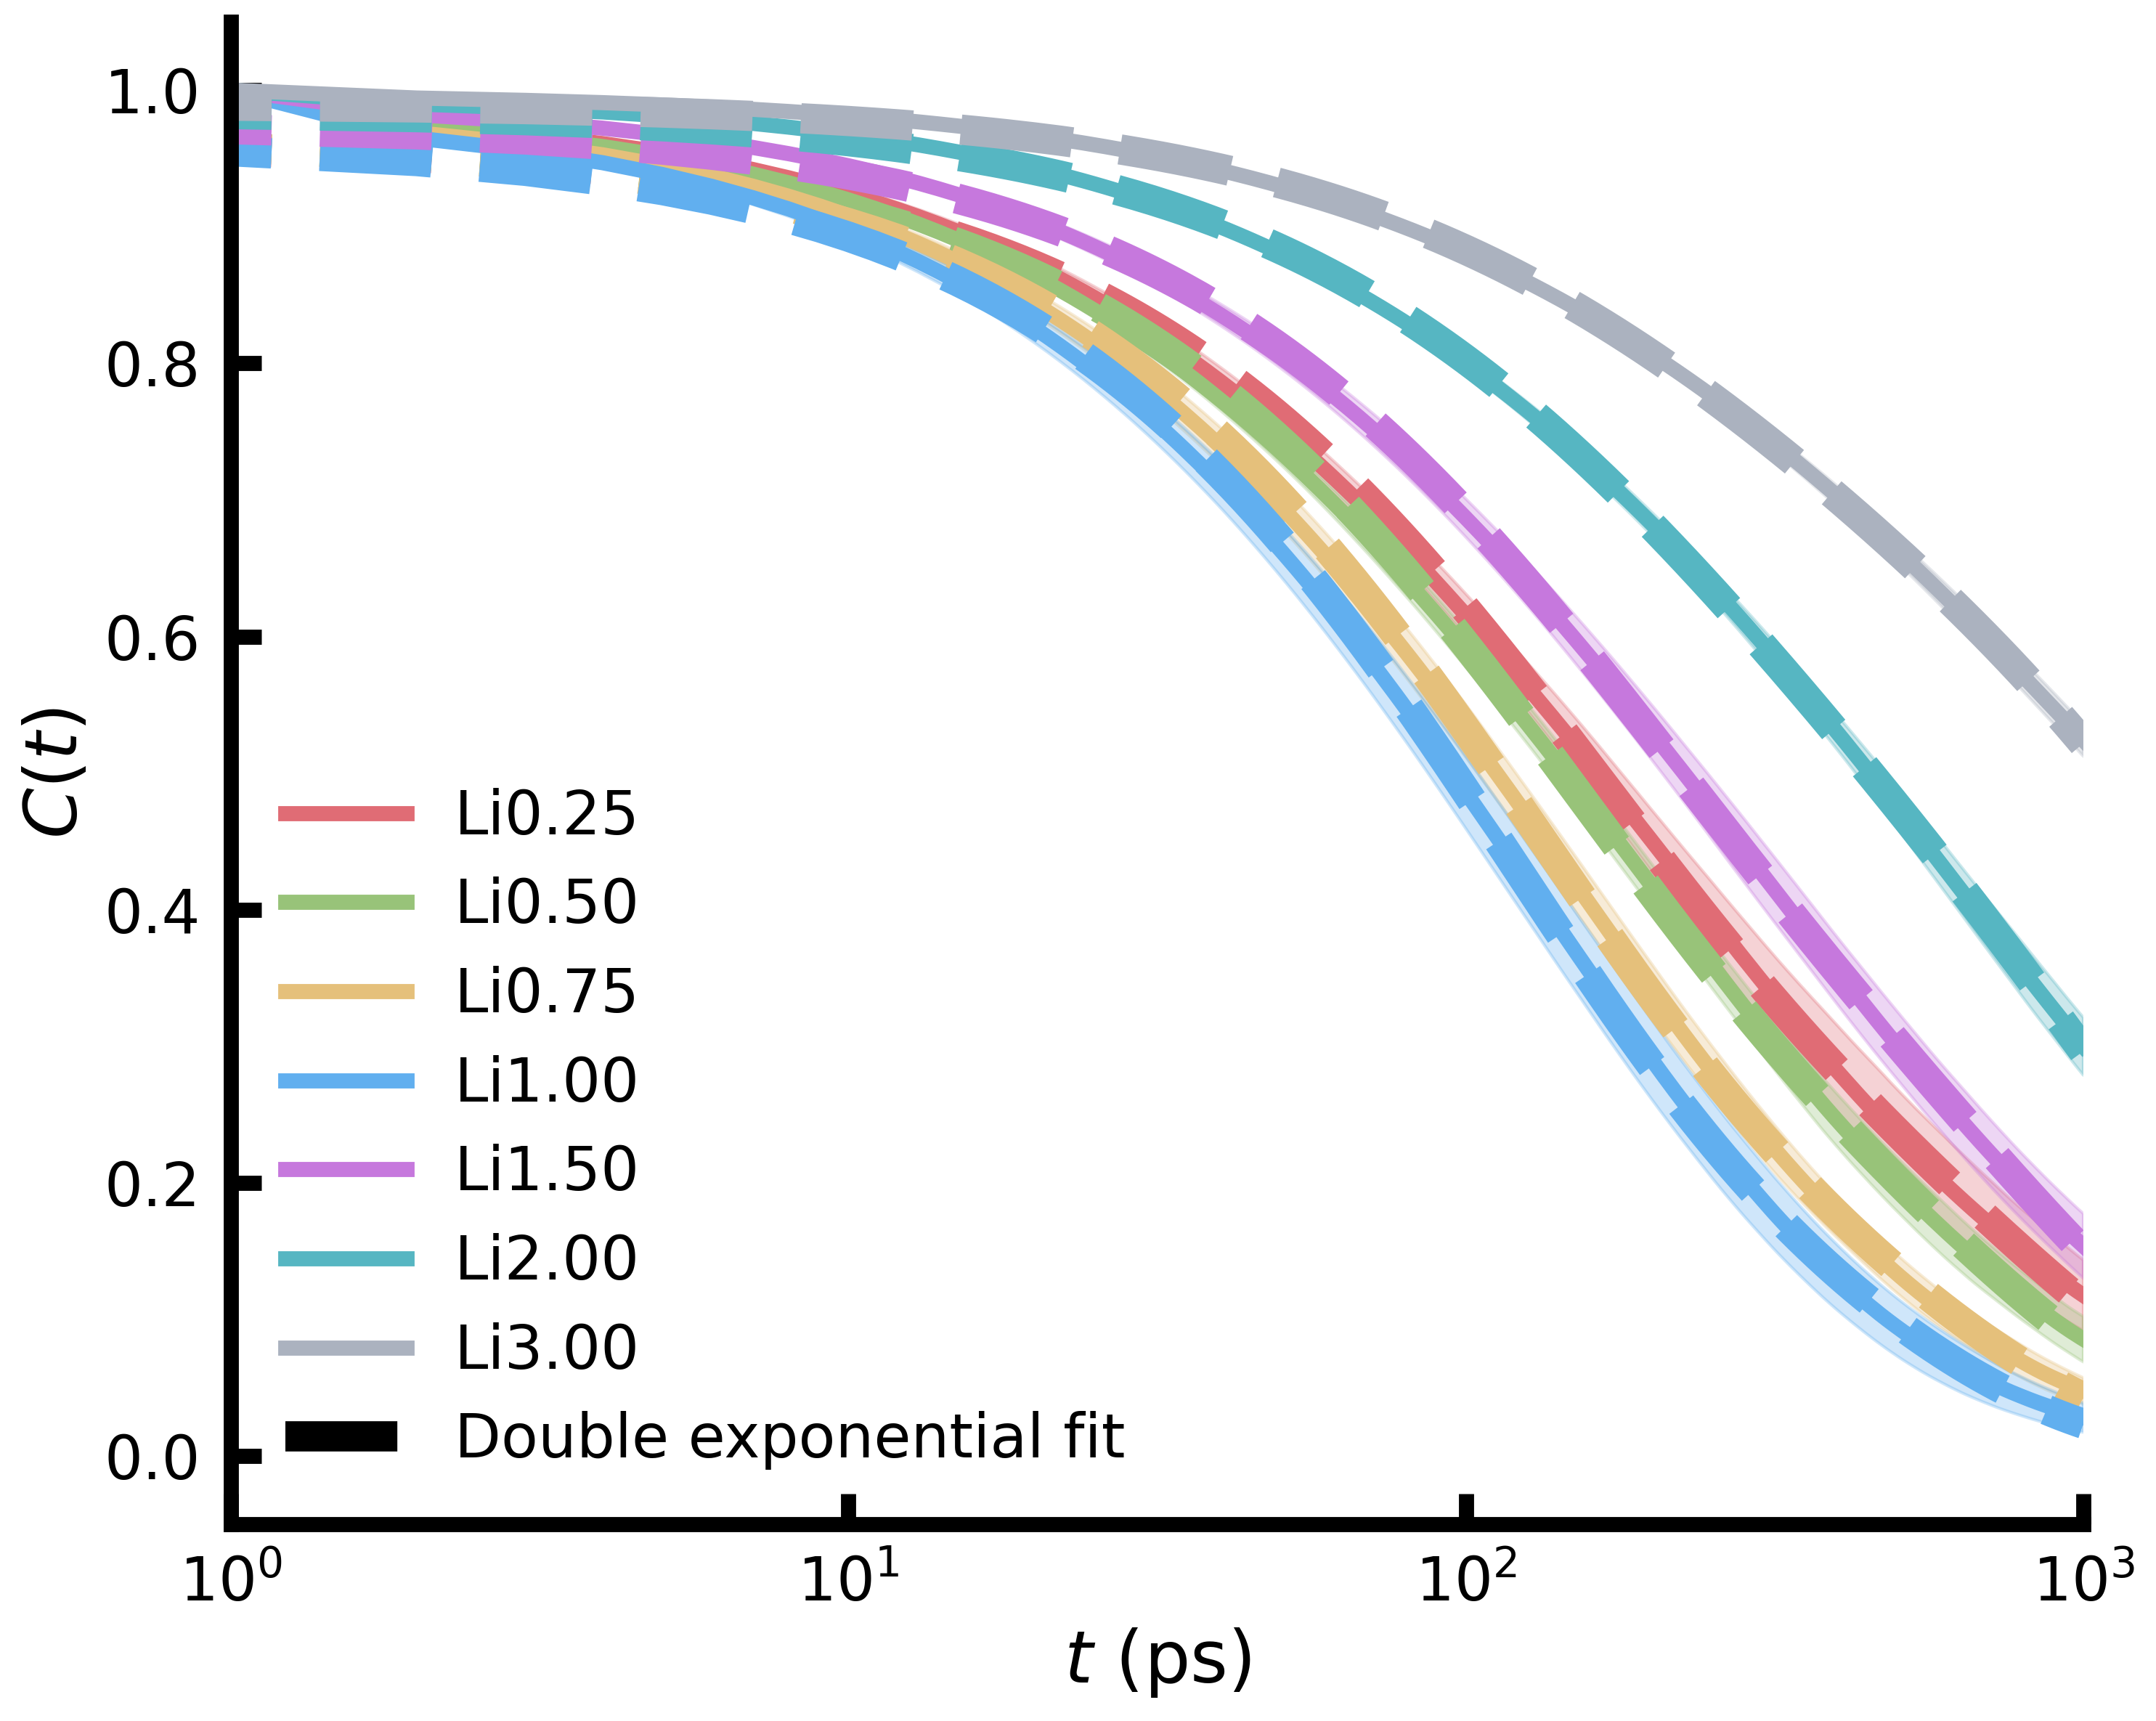

In [17]:
from scipy.optimize import curve_fit

params = {
    "linewidth" : 5,
    "axeswidth" : 5,
    "tick_labelsize" : 20,
    "axes_labelsize" : 24,
    "tick_padding" : 10,
    "markersize" : 5,
}

def double_exponential(x, a, b, c, d):
    return a * np.exp(-b * x) + c * np.exp(-d * x)

fig, ax = plt.subplots(1, 1, figsize = (10, 8), dpi = 300)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(params['axeswidth'])
ax.spines['bottom'].set_linewidth(params['axeswidth'])
ax.tick_params(labelsize = params['tick_labelsize'], pad = params['tick_padding'], length = params['axeswidth'] * 2, width = params['axeswidth'], direction = 'in')

ax.set_xlabel("$t$ (ps)", fontsize = params['axes_labelsize'])
ax.set_ylabel(r"$C(t)$", fontsize = params['axes_labelsize'])

ROOT = "/mnt/CALC_SSD/bgkang/hopping_analysis/trajectories/"
for idx, t in enumerate(["Li0.25", "Li0.50", "Li0.75", "Li1.00", "Li1.50", "Li2.00", "Li3.00"]):
    data = []
    h = []
    for e in "00", "01", "02", "03":
        temp = np.genfromtxt(f"{ROOT}/composition/{t}/ensemble{e}/survival.out")
        data.append(temp)
    avg = np.stack(data).mean(axis = 0)
    std = np.stack(data).std(axis = 0)

    ax.plot(avg[:,0], avg[:,1], linewidth = params['linewidth'], color = COLORMAP[list(COLORMAP.keys())[idx]], label = t)
    ax.fill_between(avg[:,0], avg[:,1] + std[:,1], avg[:,1] - std[:,1], color = COLORMAP[list(COLORMAP.keys())[idx]], alpha = 0.3)

    popt, pcov = curve_fit(double_exponential, avg[:,0], avg[:,1])
    ax.plot(avg[:,0], double_exponential(avg[:,0], *popt), linestyle = '--', color = COLORMAP[list(COLORMAP.keys())[idx]], linewidth = params['linewidth'] * 2)

ax.set_xscale('log')
ax.set_xlim(1, 1E3)

ax.plot(0, 0, linestyle = '--', color = 'k', linewidth = 2 * params['linewidth'], label = "Double exponential fit")

legend = ax.legend(fontsize = params['tick_labelsize'], frameon = False)
legend.get_title().set_fontsize(params['axes_labelsize'])

plt.tight_layout()
plt.savefig("survival_double.png", dpi = 300, bbox_inches = 'tight')
plt.show()